In [ ]:
# === 1. IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


In [ ]:
print("Train Protocol Type unique values:", train_df['Protocol Type'].unique()[:10])
print("Test Protocol Type unique values:", test_df['Protocol Type'].unique()[:10])
print("Train Protocol Type dtype:", train_df['Protocol Type'].dtype)
print("Test Protocol Type dtype:", test_df['Protocol Type'].dtype)


Train Protocol Type unique values: [1440 1394 1368 1439 1424 1425 1377 1343 1420 1432]
Test Protocol Type unique values: [ 6.    1.   17.    7.1   8.2  15.9  16.89  1.5   6.11  0.99]
Train Protocol Type dtype: int64
Test Protocol Type dtype: float64


In [ ]:
print(train_df.columns.tolist())
print(test_df.columns.tolist())


['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']
['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']


In [ ]:
print("Train 'Protocol Type' sample values:", train_df['Protocol Type'].unique()[:10])
print("Test 'Protocol Type' sample values:", test_df['Protocol Type'].unique()[:10])
print("Train 'Protocol Type' dtype:", train_df['Protocol Type'].dtype)
print("Test 'Protocol Type' dtype:", test_df['Protocol Type'].dtype)


Train 'Protocol Type' sample values: [1440 1394 1368 1439 1424 1425 1377 1343 1420 1432]
Test 'Protocol Type' sample values: [ 6.    1.   17.    7.1   8.2  15.9  16.89  1.5   6.11  0.99]
Train 'Protocol Type' dtype: int64
Test 'Protocol Type' dtype: float64


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test_without_label.csv")

# Strip column names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Separate labels
train_labels = train_df['label'].str.replace('_train', '', regex=False)
train_df = train_df.drop(columns=['label'])

# Step 1: Check for mixed types in 'Protocol Type' column
# Print unique values to check for numbers and categories
print("Train 'Protocol Type' unique values:", train_df['Protocol Type'].unique()[:20])
print("Test 'Protocol Type' unique values:", test_df['Protocol Type'].unique()[:20])

# Step 2: Handle missing values and encoding for 'Protocol Type'
# If there are numeric values, we will treat them as invalid/missing
train_df['Protocol Type'] = train_df['Protocol Type'].apply(lambda x: str(x) if isinstance(x, str) else 'missing')
test_df['Protocol Type'] = test_df['Protocol Type'].apply(lambda x: str(x) if isinstance(x, str) else 'missing')

# Handle missing values in 'Protocol Type' (fill with 'missing' if any)
train_df['Protocol Type'].fillna('missing', inplace=True)
test_df['Protocol Type'].fillna('missing', inplace=True)

# Step 3: Encode 'Protocol Type' column using LabelEncoder
encoder = LabelEncoder()
train_df['Protocol Type'] = encoder.fit_transform(train_df['Protocol Type'])
test_df['Protocol Type'] = encoder.transform(test_df['Protocol Type'])

# Step 4: Handle missing values for numeric columns
numeric_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

imputer = SimpleImputer(strategy='mean')
train_df[numeric_columns] = imputer.fit_transform(train_df[numeric_columns])
test_df[numeric_columns] = imputer.transform(test_df[numeric_columns])

# Step 5: Normalize the data (all features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df)
X_test_scaled = scaler.transform(test_df)

print("Data preprocessing is complete.")


Train 'Protocol Type' unique values: [17.   16.12 15.79 16.89 16.66 16.67 15.9  15.57 16.56 16.78 16.45 16.34
 14.91 16.83 15.68 16.23 16.02 14.25 15.35 15.46]
Test 'Protocol Type' unique values: [ 6.    1.   17.    7.1   8.2  15.9  16.89  1.5   6.11  0.99  2.1  13.7
 10.4  16.84 15.46  1.05  1.6  16.78  2.2   5.94]
Data preprocessing is complete.


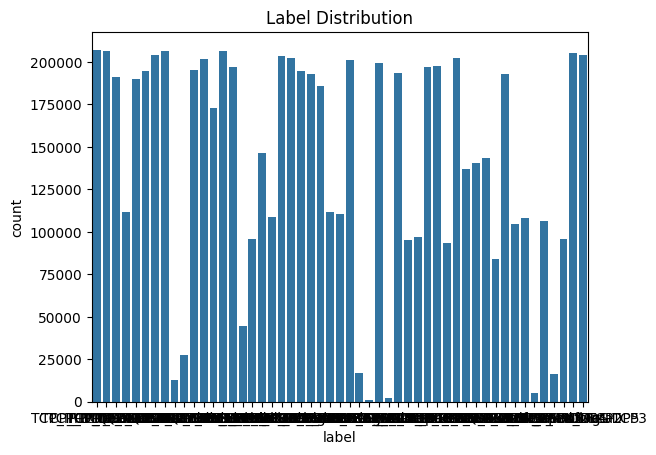

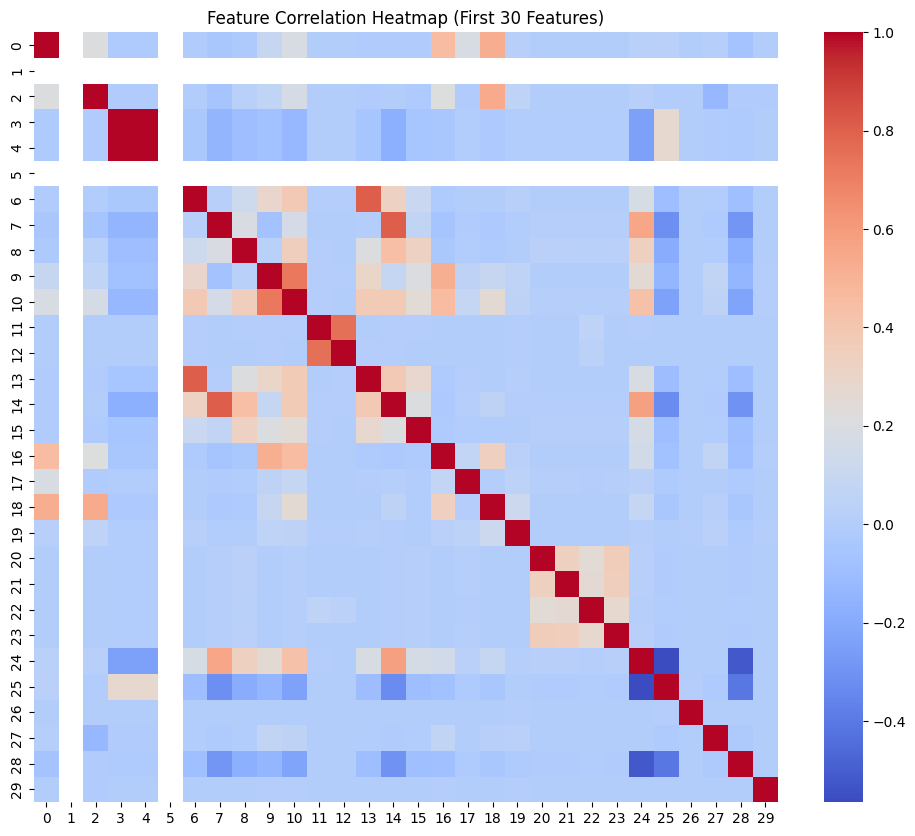

Summary Stats of First 5 Features:
                   0          1             2             3             4
count  7.160831e+06  7160831.0  7.160831e+06  7.160831e+06  7.160831e+06
mean  -1.536222e-17        0.0  9.446224e-16 -8.677141e-17 -8.677141e-17
std    1.000000e+00        0.0  1.000000e+00  1.000000e+00  1.000000e+00
min   -1.071026e-01        0.0 -7.703202e+00 -3.855262e-01 -3.855262e-01
25%   -1.069071e-01        0.0 -8.881726e-02 -3.853570e-01 -3.853570e-01
50%   -1.067117e-01        0.0 -8.881726e-02 -3.818489e-01 -3.818489e-01
75%   -3.622600e-02        0.0 -8.881726e-02  9.908449e-02  9.908449e-02
max    3.571267e+01        0.0  2.263536e+01  5.269393e+01  5.269393e+01


In [ ]:
# Visualize label distribution
sns.countplot(x=train_labels)
plt.title("Label Distribution")
plt.show()

# Correlation matrix (visualize only top 30 features to avoid clutter)
corr_matrix = pd.DataFrame(X_train_scaled).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.iloc[:30, :30], cmap='coolwarm')
plt.title("Feature Correlation Heatmap (First 30 Features)")
plt.show()

# Summary statistics
print("Summary Stats of First 5 Features:\n", pd.DataFrame(X_train_scaled).iloc[:, :5].describe())


In [ ]:
# === 1. IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# === 2. DATA LOADING AND INITIAL PROCESSING ===

# Load datasets with new variable names
network_train_data = pd.read_csv("train.csv")
network_test_data = pd.read_csv("test_without_label.csv")

# Clean column names
network_train_data.columns = network_train_data.columns.str.strip()
network_test_data.columns = network_test_data.columns.str.strip()

# Extract target labels
network_labels = network_train_data['label'].str.replace('_train', '', regex=False)
features_train = network_train_data.drop(columns=['label'])
features_test = network_test_data.copy()

# === 3. PROTOCOL TYPE HANDLING ===

# Convert Protocol Type to string and handle missing values
features_train['Protocol Type'] = features_train['Protocol Type'].apply(
    lambda x: str(x) if isinstance(x, str) else 'missing')
features_test['Protocol Type'] = features_test['Protocol Type'].apply(
    lambda x: str(x) if isinstance(x, str) else 'missing')

# Fill any remaining missing values
features_train['Protocol Type'].fillna('missing', inplace=True)
features_test['Protocol Type'].fillna('missing', inplace=True)

# Encode Protocol Type
protocol_encoder = LabelEncoder()
features_train['Protocol Type'] = protocol_encoder.fit_transform(features_train['Protocol Type'])
features_test['Protocol Type'] = protocol_encoder.transform(features_test['Protocol Type'])

# === 4. NUMERIC FEATURE PROCESSING ===

# Select numeric columns
numeric_features = features_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Impute missing values
value_imputer = SimpleImputer(strategy='mean')
features_train[numeric_features] = value_imputer.fit_transform(features_train[numeric_features])
features_test[numeric_features] = value_imputer.transform(features_test[numeric_features])

# === 5. FEATURE SCALING ===

# Scale all features
feature_scaler = StandardScaler()
scaled_train_features = feature_scaler.fit_transform(features_train)
scaled_test_features = feature_scaler.transform(features_test)

print("Initial data processing complete.")

# === 6. DIMENSIONALITY REDUCTION WITH PCA ===

# Apply PCA to retain 95% of variance
pca_reducer = PCA(n_components=0.95)
pca_train_features = pca_reducer.fit_transform(scaled_train_features)
pca_test_features = pca_reducer.transform(scaled_test_features)

print(f"Reduced from {scaled_train_features.shape[1]} to {pca_train_features.shape[1]} features")

# === 7. SAVE PCA-REDUCED FEATURES ===

# Create DataFrames for reduced features
reduced_train_df = pd.DataFrame(pca_train_features,
                               columns=[f"pca_feature_{i}" for i in range(pca_train_features.shape[1])])
reduced_test_df = pd.DataFrame(pca_test_features,
                              columns=[f"pca_feature_{i}" for i in range(pca_test_features.shape[1])])

# Add labels to training data for visualization
reduced_train_df['attack_type'] = network_labels.values

# Save to new files
reduced_train_df.to_csv("pca_reduced_train_features.csv", index=False)
reduced_test_df.to_csv("pca_reduced_test_features.csv", index=False)

print("PCA-reduced features saved to CSV files.")

# === 8. VISUALIZATION ===

# Label distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=network_labels)
plt.title("Network Attack Type Distribution")
plt.xticks(rotation=45)
plt.show()

# PCA components visualization
plt.figure(figsize=(10, 8))
plt.scatter(pca_train_features[:, 0], pca_train_features[:, 1],
            c=LabelEncoder().fit_transform(network_labels), alpha=0.6)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("First Two PCA Components")
plt.colorbar(label='Attack Type')
plt.show()

# === 9. MODEL TRAINING ===

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(network_labels)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    pca_train_features, encoded_labels, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
val_predictions = rf_model.predict(X_val)
print("\nClassification Report:")
print(classification_report(y_val, val_predictions, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_val, val_predictions),
            annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === 10. FINAL PREDICTIONS ===

# Predict on test set
final_predictions = label_encoder.inverse_transform(rf_model.predict(pca_test_features))

# Create submission file
submission_data = pd.DataFrame({
    'index': range(len(final_predictions)),
    'label': final_predictions
})
submission_data.to_csv("network_intrusion_predictions.csv", index=False)

print("\nFinal predictions saved to 'network_intrusion_predictions.csv'")

Epoch 1/3
25175/25175 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - loss: 0.1155 - val_loss: 0.0296
Epoch 2/3
25175/25175 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - loss: 0.0235 - val_loss: 0.0125
Epoch 3/3
25175/25175 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - loss: 0.0174 - val_loss: 0.0113
223776/223776 ━━━━━━━━━━━━━━━━━━━━ 74s 330us/step
50444/50444 ━━━━━━━━━━━━━━━━━━━━ 17s 331us/step
Compression complete, embeddings saved to CSV.
